<a href="https://colab.research.google.com/github/G-Gaddu/Quant-Material/blob/main/PCA%20alpha%20analysis%20on%20top%2010%20FTSE%20100%20Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
import warnings
warnings.filterwarnings('ignore')


In [30]:
# Define the tickers for the 10 largest stocks on the FTSE 100 and get data for the last 2 years
tickers = ["AZN", "LIN", "SHEL.L", "ULVR.L", "AZN.L", "HSBC", "ARM", "RIO", "GSK", "BP.L"]

# Download the data
data = yf.download(tickers, start = "2022-09-07", end = "2024-09-07")

[*********************100%***********************]  10 of 10 completed


In [31]:
portfolio_returns = data['Adj Close'].pct_change().dropna()

In [32]:
pca = PCA(n_components=5)
pca.fit(portfolio_returns)

PCA(n_components=5)

In [33]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

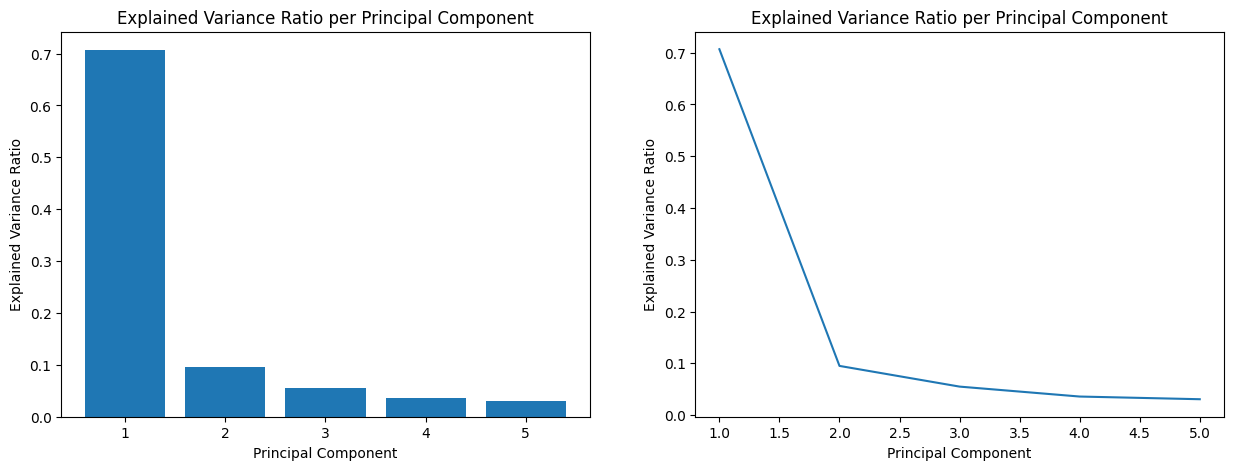

In [34]:
# Visualise the explained variance for each principal component
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
axs[0].bar(range(1, len(pct) + 1), pct)
axs[0].set_xlabel("Principal Component")
axs[0].set_ylabel("Explained Variance Ratio")
axs[0].set_title("Explained Variance Ratio per Principal Component")

# Line graph
axs[1].plot(range(1, len(pct) + 1), pct)
axs[1].set_xlabel("Principal Component")
axs[1].set_ylabel("Explained Variance Ratio")
axs[1].set_title("Explained Variance Ratio per Principal Component")

plt.show()


In [35]:
X = np.asarray(portfolio_returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["f1", "f2", "f3", "f4", "f5"], index = portfolio_returns.index, data=factor_returns)
factor_returns.head()

,f1,f2,f3,f4,f5
Date,,,,,
2023-09-15 00:00:00+00:00,-0.045801,-0.006277,0.007220,0.005754,0.005853
2023-09-18 00:00:00+00:00,-0.043690,0.028266,-0.015849,-0.003113,-0.010204
2023-09-19 00:00:00+00:00,-0.047146,-0.006885,-0.018052,-0.007050,-0.010935
2023-09-20 00:00:00+00:00,-0.044615,-0.018479,0.025446,0.014586,0.008145
2023-09-21 00:00:00+00:00,-0.014552,0.025185,-0.005884,0.010085,0.006724


<Axes: xlabel='Ticker'>

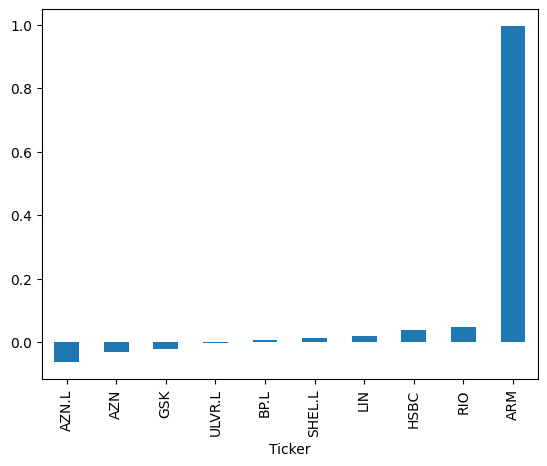

In [36]:
factor_exposures = pd.DataFrame(index=["f1", "f2", "f3", "f4", "f5"], columns=portfolio_returns.columns, data=pca_components).T
factor_exposures.f1.sort_values().plot.bar()

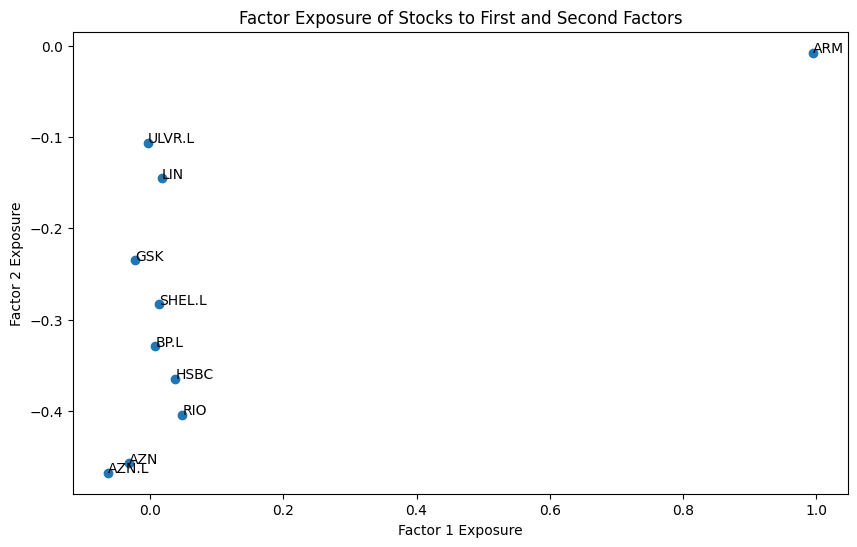

In [37]:
# prompt: create a scatter plot to show the factor exposure of the stocks to the 1st and 2nd factors
plt.figure(figsize=(10, 6))
plt.scatter(factor_exposures['f1'], factor_exposures['f2'])
plt.xlabel('Factor 1 Exposure')
plt.ylabel('Factor 2 Exposure')
plt.title('Factor Exposure of Stocks to First and Second Factors')
for i, txt in enumerate(factor_exposures.index):
    plt.annotate(txt, (factor_exposures['f1'][i], factor_exposures['f2'][i]))
plt.show()
